In [2]:
import pandas as pd
import numpy as np
df1=pd.read_csv('20131.csv',encoding = "GB2312") #import document

In [6]:
#导出pick文件
import cPickle as pickle
with open('data20131.pickle','rb') as file:
    a=pickle.load(file)

ModuleNotFoundError: No module named 'cPickle'

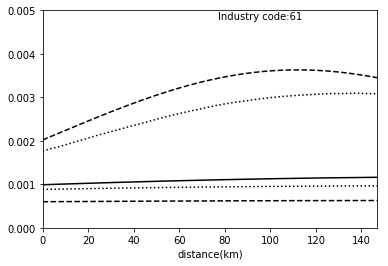

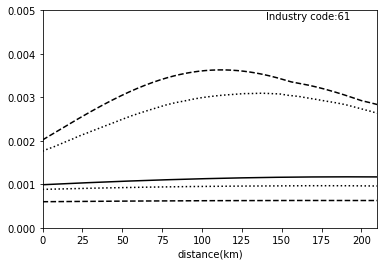

--- 106.886999846 seconds ---


KeyboardInterrupt: 

In [4]:
import time
start_time = time.time()
import pickle
from collections import Counter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import random
import pandas as pd
import itertools

mid=147
mid1=210

###筛选企业数大于50的行业代码
ind_code3=df1['ind_code3']#取出三位数行业代码
ranlist=df1.index.tolist()#全部索引to list 后面反事实检验时的取样集
result = Counter(ind_code3)#统计企业数量
p1 = dict((key, value) for key, value in result.items() if value > 50)#筛选企业数超过50的行业
ind_codex=list(p1.keys())#行业代码目录
#w=1#for test
w=len(ind_codex)#一共要计算的行业数
m=0
#m=0#for test
finalresult20131={}
finalresult201311={}
while m<w:
    ind_code=ind_codex[m]#取出行业代码
    df2=df1[df1['ind_code3'] == ind_code]#取出某一行业内所有企业
    b=df2.index.tolist()#将取出的某一行业的索引提取
    n=df2.shape[0]#该行业行业数量
    N=n*(n-1)//2#一共要提取的距离数量
    #提取距离
    np.set_printoptions(suppress=True)
    di=np.empty(shape=[1,N])
    i=0
    q=0
    while i<n:
        j=i+1
        while j<n:
            x=b[i]
            y=b[j]
            di[0,q]=a[x][0,y-x-1]#di为取出的距离矩阵
            q=q+1
            j=j+1
        i=i+1
    
    ####计算行业m的K分布
    
    X = np.concatenate(di)[:, np.newaxis] 
    ## making the model
    X_plot = np.linspace(0, mid, mid+1)[:, np.newaxis] # make the grid array 
    X_plot1=np.linspace(0, mid1, mid1+1)[:, np.newaxis]
    #######get kernel density and make the line ### 
    h = np.std(X)*(4/3/N)**(1/5)#Bandwidth estimated by Silverman's Rule of Thumb
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X) ## fit the data point, output a kernel density function
    log_dens_fact = kde.score_samples(X_plot)  ## sample the kernel density function for the grid, ouput log(density)s
    log_dens_fact1 = kde.score_samples(X_plot1) 
    dens_fact=np.exp(log_dens_fact)
    dens_fact1=np.exp(log_dens_fact1)
    ##log_dens_fact是实际值，取自然指数后得最终值
    
    
    
    #####反事实检验：抽1000次样本
    #随机抽出样本de
    c=0#抽样次数
    f=np.empty(shape=[1000, mid+1])#放置空矩阵存放模拟结果
    f1=np.empty(shape=[1000, mid1+1])
    while c<1000:
        e = random.sample(ranlist,n)#取出n个随机数
        e.sort(reverse=False)#降序排列
        de=np.empty(shape=[1,n*(n-1)//2])
        i=0
        q=0
        while i<n:
            j=i+1
            while j<n:
                x=e[i]
                y=e[j]
                de[0,q]=a[x][0,y-x-1]#de是每次取出的样本
                q=q+1
                j=j+1
            i=i+1
        
    #中位数+1个点K密度计算
        X = np.concatenate(de)[:, np.newaxis] 
    ## making the model
        #X_plot = np.linspace(0, mid, mid+1)[:, np.newaxis] # make the grid array 
    #######get kernel density  ### 
        h = np.std(X)*(4/3/N)**(1/5)#Bandwidth estimated by Silverman's Rule of Thumb
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X) ## fit the data point, output a kernel density function
        log_dens = kde.score_samples(X_plot)  ## sample the kernel density function for the grid, ouput log(density)s
        e_dens=np.exp(log_dens)
        log_dens1 = kde.score_samples(X_plot1)  ## sample the kernel density function for the grid, ouput log(density)s
        e_dens1=np.exp(log_dens1)
        f[c]=e_dens
        f1[c]=e_dens1
        c=c+1
    #确定全局&5%和95%置信带
    q_5=np.percentile(f, 5,axis=0)
    q_95=np.percentile(f, 95,axis=0)
    q_0=np.min(f,axis=0)
    q_100=np.max(f, axis=0)
    q_51=np.percentile(f1, 5,axis=0)
    q_951=np.percentile(f1, 95,axis=0)
    q_01=np.min(f1,axis=0)
    q_1001=np.max(f1, axis=0)
    #mid作图
    fig, ax = plt.subplots()
    ax.plot(X_plot[:, 0], q_5, 'k:')
    ax.plot(X_plot[:, 0], q_95, 'k:')
    ax.plot(X_plot[:, 0], q_0, 'k--')
    ax.plot(X_plot[:, 0], q_100, 'k--')
    ax.plot(X_plot[:, 0], dens_fact, 'k-')
    #设置输出图表格式
    ax.set_xlim(0, mid)  ## limits for x axis
    ax.set_ylim(0, 0.005)  ##limits for y axis
    ax.set_xlabel('distance(km)')#x轴副标题
    ax.text(mid-70, 0.0048, "Industry code:{0}".format(ind_code))#图右上附注行业代码
    plt.show() ## show the final plot
    name='industry'+str(ind_code)+"-"+str(mid)+'km20131.jpg'
    fig.savefig(name, dpi=300)#保存图表  
    
    #mid1作图
    fig, ax = plt.subplots()
    ax.plot(X_plot1[:, 0], q_51, 'k:')
    ax.plot(X_plot1[:, 0], q_951, 'k:')
    ax.plot(X_plot1[:, 0], q_01, 'k--')
    ax.plot(X_plot1[:, 0], q_1001, 'k--')
    ax.plot(X_plot1[:, 0], dens_fact1, 'k-')
    #设置输出图表格式
    ax.set_xlim(0, mid1)  ## limits for x axis
    ax.set_ylim(0, 0.005)  ##limits for y axis
    ax.set_xlabel('distance(km)')#x轴副标题
    ax.text(mid1-70, 0.0048, "Industry code:{0}".format(ind_code))#图右上附注行业代码
    plt.show() ## show the final plot
    name='industry'+str(ind_code)+"-"+str(mid1)+'km20131.jpg'
    fig.savefig(name, dpi=300)#保存图表 
    
    finalresult20131['{0}-q100'.format(ind_code)]=q_100
    finalresult20131["{0}-q095".format(ind_code)]=q_95
    finalresult20131["{0}-q005".format(ind_code)]=q_5
    finalresult20131["{0}-q000".format(ind_code)]=q_0
    finalresult20131["{0}-fact".format(ind_code)]=dens_fact
    
    finalresult201311['{0}-q100'.format(ind_code)]=q_1001
    finalresult201311["{0}-q095".format(ind_code)]=q_951
    finalresult201311["{0}-q005".format(ind_code)]=q_51
    finalresult201311["{0}-q000".format(ind_code)]=q_01
    finalresult201311["{0}-fact".format(ind_code)]=dens_fact1
    m=m+1
    print("--- %s seconds ---" % (time.time() - start_time)) 

In [ ]:
import cPickle
file=open('result20131.pickle','wb')
cPickle.dump(finalresult, file, True)
file.close()


In [ ]:
import cPickle
file=open('result201311.pickle','wb')
cPickle.dump(finalresult1, file, True)
file.close()

In [ ]:
print(kde)

In [ ]:
result={}
result['{0}-q100'.format(ind_code)]=q_100
result["{0}-q095".format(ind_code)]=q_95
result["{0}-q005".format(ind_code)]=q_5
result["{0}-q000".format(ind_code)]=q_0
result["{0}-fact".format(ind_code)]=dens_fact
import pickle
with open('result.pickle','wb') as file:
       pickle.dump(dict,file)

In [ ]:
finalresult

In [ ]:
q005=finalresult['314-q005']
q095=finalresult['314-q095']
qfact=finalresult['314-fact']

In [ ]:
qminus=qfact-q005

In [ ]:
max1=np.max(qminus)
print(max1)
distant=int(np.argwhere(qminus==max1))#转化索引 为边界距离
print(distant)

In [ ]:
print(q)
print(x)
print(y-x)
len(a)
len(a[3])

In [ ]:
#三位数行业代码遍历
ind_code3=df1['ind_code3']
ind_code3.tolist
ind_code3 = list(set(ind_code3))
code_number=len(ind_code3)
ind_code=ind_code3[30]

In [ ]:
#两位数行业代码遍历
ind_code2=df1['ind_code2']
ind_code2.tolist
from collections import Counter
result = Counter(ind_code2)
print(result)

In [ ]:
#三位数行业代码遍历
ind_code3=df1['ind_code3']
ind_code3.tolist
from collections import Counter
result = Counter(ind_code3)
print(result)

In [ ]:
print(result[243])

In [ ]:
df2=df1[df1['ind_code3'] == ind_code]
b=df2.index.tolist()
#n是某个行业的数量
#n=50
n=df2.shape[0]
N=n*(n-1)//2
print(b)
print(n)

In [ ]:
#构建行业i的距离子集
import time
start_time = time.time()
np.set_printoptions(suppress=True)
di=np.empty(shape=[1,N])
i=0
q=0
while i<n:
    j=i+1
    while j<n:
        x=b[i]
        y=b[j]
        di[0,q]=a[x][0,y-x]
        q=q+1
        j=j+1
    i=i+1
#print(di)
print("--- %s seconds ---" % (time.time() - start_time)) 

In [ ]:
#计算所有距离的中位数
import time
start_time = time.time()
import numpy as np
mid=int(np.median(q))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
import time
start_time = time.time()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
X = np.concatenate(di)[:, np.newaxis] 
## making the model
X_plot = np.linspace(0, mid, mid+1)[:, np.newaxis] # make the grid array 
fig, ax = plt.subplots() ## get the axis object
#######get kernel density and make the line ### 
h = np.std(X)*(4/3/N)**(1/5)#Bandwidth estimated by Silverman's Rule of Thumb
kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X) ## fit the data point, output a kernel density function
log_dens_fact = kde.score_samples(X_plot)  ## sample the kernel density function for the grid, ouput log(density)s
ax.plot(X_plot[:, 0], np.exp(log_dens_fact), 'k-') ## tansfer to the real density values, then print (x grid, dens)
ax.set_xlim(0, mid)  ## limits for x axis
ax.set_ylim(0, 0.004)  ##limits for y axis
plt.show() ## show the final plot
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
import time
start_time = time.time()
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
#随机抽出样本de
c=0#抽样次数
f=np.empty(shape=[1000, mid+1])
while c<1000:
    e = random.sample(total,N)
    de=np.empty(shape=[1,n*(n-1)//2])
    i=0
    while i<N:
        de[0,i]=e[i]
        i=i+1
#中位数+1个点K密度计算
    X = np.concatenate(de)[:, np.newaxis] 
## making the model
    X_plot = np.linspace(0, mid, mid+1)[:, np.newaxis] # make the grid array 
#######get kernel density  ### 
    h = np.std(X)*(4/3/N)**(1/5)#Bandwidth estimated by Silverman's Rule of Thumb
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X) ## fit the data point, output a kernel density function
    log_dens = kde.score_samples(X_plot)  ## sample the kernel density function for the grid, ouput log(density)s
    e_dens=np.exp(log_dens)
    f[c]=e_dens
    c=c+1
#确定全局&5%和95%置信带
q_5=np.percentile(f, 5,axis=0)
q_95=np.percentile(f, 95,axis=0)
q_0=np.percentile(f, 0,axis=0)
q_100=np.percentile(f, 100,axis=0)
#作图
fig, ax = plt.subplots()
ax.plot(X_plot[:, 0], q_5, 'k:')
ax.plot(X_plot[:, 0], q_95, 'k:')
ax.plot(X_plot[:, 0], q_0, 'k--')
ax.plot(X_plot[:, 0], q_100, 'k--')
ax.plot(X_plot[:, 0], np.exp(log_dens_fact), 'k-')## tansfer to the real density values, then print (x grid, dens)
ax.set_xlim(0, mid)  ## limits for x axis
ax.set_ylim(0, 0.005)  ##limits for y axis
ax.set_xlabel('distance(km)')
ax.text(150, 0.0048, "Industry code:{0}".format(ind_code))
plt.show() ## show the final plot
name='industry'+str(ind_code)+'.png'
fig.savefig(name, dpi=300)
print("--- %s seconds ---" % (time.time() - start_time)) 